In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns 

df = pd.read_csv("C:\\Users\\Selltricks\\Downloads\\archive (2)\\creditcard.csv")
print(df.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [27]:
df = df.drop(['Time'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


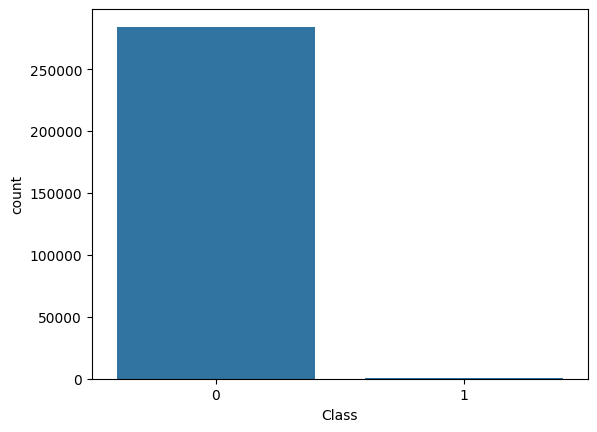

In [28]:
# Class Distribution
ax=sns.countplot(x='Class', data=df)


In [29]:

sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [30]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size=0.4)
len(X_train)


170884

In [35]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)
print("Before performing smote : ", Counter(y_train))
print("After performing smote : ", Counter(y_train_smote))


Before performing smote :  Counter({0: 170580, 1: 304})
After performing smote :  Counter({0: 170580, 1: 170580})


In [33]:
model_ws_1 = LogisticRegression(solver='lbfgs', max_iter=1000)
model_ws_1.fit(X_train, y_train)
y_pred_ws_3 = model_ws_1.predict(X_test)


In [34]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_ws_3)
print("Confusion Matrix:\n", cm)

# Classification Report (Precision, Recall, F1, etc.)
print("\nClassification Report:\n", classification_report(y_test, y_pred_ws_3))

# Individual Metrics
acc = accuracy_score(y_test, y_pred_ws_3)
prec = precision_score(y_test, y_pred_ws_3, average='binary')  # Change average='macro' or 'weighted' for multi-class
rec = recall_score(y_test, y_pred_ws_3, average='binary')
f1 = f1_score(y_test, y_pred_ws_3, average='binary')

# Display Results
results = {
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1
}
print("\nResults:", results)




Confusion Matrix:
 [[113713     22]
 [    72    116]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    113735
           1       0.84      0.62      0.71       188

    accuracy                           1.00    113923
   macro avg       0.92      0.81      0.86    113923
weighted avg       1.00      1.00      1.00    113923


Results: {'Accuracy': 0.9991748812794606, 'Precision': 0.8405797101449275, 'Recall': 0.6170212765957447, 'F1 Score': 0.7116564417177915}
